# Task1：图像读写
- 要求：

   （1）使用cv2库读取图像然后保存为灰度图像；

In [30]:
import cv2
import numpy

In [31]:
#读取图片
img=cv2.imread("C:\\Users\\LDH\\Desktop\\Test_1\\task1\\IMAGE.jpg")
cv2.imshow("IMAGE",img)

In [32]:
#转换
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray", imgGray)

In [33]:
k = cv2.waitKey(0)
if k == 27:         # 按下esc时，退出
    cv2.destroyAllWindows()
elif k == ord('s'): # 按下s键时保存并退出
    cv2.imwrite('C:\\Users\\LDH\\Desktop\\Test_1\\Report\\image\\imgGray.jpg', imgGray)
    cv2.destroyAllWindows()

![imgGray](image/imgGray.jpg)

   （2）使用imageio库读取图像，然后保存为png和tiff格式；

In [34]:
import numpy as np
from imageio.v2 import imread,imsave

In [35]:
#读取图片
img=imread("C:\\Users\\LDH\\Desktop\\Test_1\\task1\\IMAGE.jpg")
print(img.dtype,img.shape)

uint8 (2160, 3840, 4)


In [36]:
#保存图片
imsave('C:\\Users\\LDH\\Desktop\\Test_1\\Report\\image\\imageio_png.png', img)
imsave('C:\\Users\\LDH\\Desktop\\Test_1\\Report\\image\\imageio_tiff.tiff', img)

   （3）使用PIL库读取图像转化为numpy数组格式，然后再转化回PIL格式，缩小为200x200大小后保存为bmp格式

In [37]:
import numpy as np
from PIL import Image
import math

In [38]:
#PIL.Image转numpy.array
img = Image.open("C:\\Users\\LDH\\Desktop\\Test_1\\task1\\IMAGE.jpg")
imgArray = np.array(img)
print(imgArray.shape)

(2160, 3840, 4)


In [39]:
#numpy.array转PIL.Image
from PIL import Image
img2 = Image.fromarray(np.uint8(imgArray))
#缩小尺寸并保存
img2 = img2.resize((200, 200), Image.LANCZOS)
imsave('C:\\Users\\LDH\\Desktop\\Test_1\\Report\\image\\img2.bmp' ,img2)

![im2.bmp](image/img2.bmp)

# Task2：图像可视化

- 要求：
  
    编写python代码利用matplotlib库可视化图像以及对应的RGB三通道

In [40]:
import matplotlib.image as image
import matplotlib.pyplot as plt

img_shape (1706, 1280, 3)
img_size 6551040
img_dtype uint8
img [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 81 104 112]
  [ 80 105 112]
  [ 81 106 111]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 84 107 115]
  [ 81 104 110]
  [ 75 100 105]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 81 101 110]
  [ 82 102 109]
  [ 72  96 100]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
img_type <class 'numpy.ndarray'>


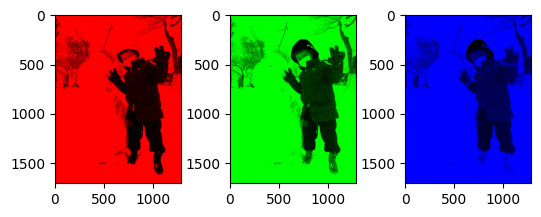

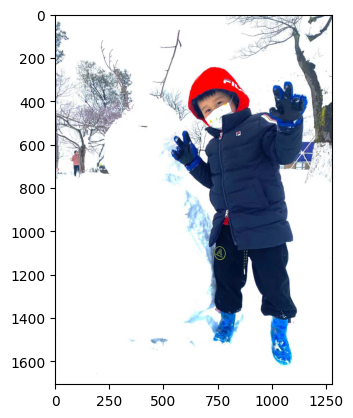

In [41]:
# 1.利用matplotlib库可视化图像以及对应的RGB三通道
img = image.imread("C:\\Users\\LDH\\Desktop\\Test_1\\task2\\yuanbao.jpg")

print('img_shape',img.shape)     #读取数据的形状
print('img_size',img.size)       #读取数据的大小
print('img_dtype',img.dtype)     #读取数据的编码格式
print('img',img)                 #打印img数据
print('img_type',type(img))      #读取img的数据类型
 
r, g, b = cv2.split(img)    #通道分离
# print(img.shape[:2])
zeros = np.zeros(img.shape[:2],dtype='uint8')
merge_r = cv2.merge([r,zeros,zeros])
merge_g = cv2.merge([zeros,g,zeros])
merge_b = cv2.merge([zeros,zeros,b])

plt.subplot(234);plt.imshow(merge_r)
plt.subplot(235);plt.imshow(merge_g)
plt.subplot(236);plt.imshow(merge_b)
plt.show()
 
plt.imshow(img)
plt.show()

#  Task3：图像基本操作

- 要求：
  
    （1）在图像上加上随机高斯噪声（加法操作），并可视化。

In [42]:
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt

In [43]:
def gaussian_noise(img, mean=0.1, sigma=0.1):
    """
    添加高斯噪声
    :param img:原图
    :param mean:均值
    :param sigma:标准差 值越大，噪声越多
    :return:噪声处理后的图片
    """
    img = np.asarray(img / 255, dtype=np.float32)  # 图片灰度标准化
    noise = np.random.normal(mean, sigma, img.shape).astype(dtype=np.float32)  # 产生高斯噪声
    output = img + noise  # 将噪声和图片叠加
    output = np.clip(output, 0, 1)
    output = np.uint8(output * 255)
    return output

(-0.5, 1279.5, 1705.5, -0.5)

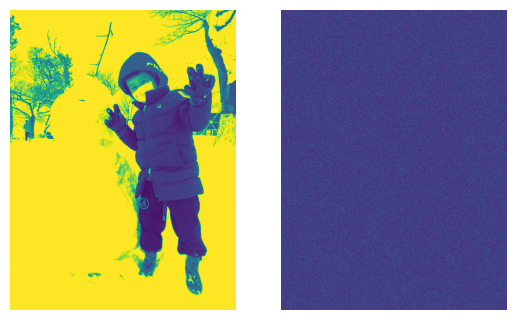

In [44]:
img_original = image.imread("C:\\Users\\LDH\\Desktop\\Test_1\\task3_operations\\yuanbao.png")
img_gaussian = gaussian_noise(img_original)

# 可视化
plt.subplot(1, 2, 1)
plt.imshow(img_original)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_gaussian)
plt.axis('off')

   （2）计算两张图像的差图（减法操作），并可视化

(-0.5, 1279.5, 1705.5, -0.5)

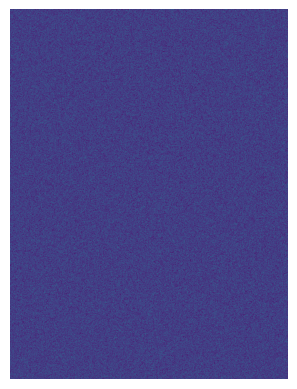

In [45]:
img_diff = abs(img_original - img_gaussian)
plt.imshow(img_diff)
plt.axis('off')

   (3) 用不同方法计算两张合成图的并集区域

(-0.5, 1279.5, 1705.5, -0.5)

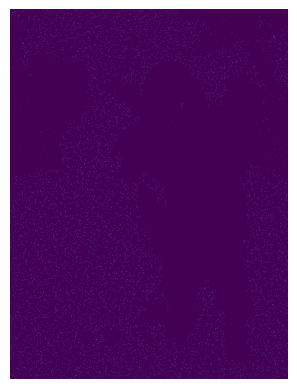

In [46]:
# (1) 直接判断像素点 RGB 是否相同
img_same = (img_gaussian == img_original) * 255
plt.imshow(img_same)
plt.axis('off')

(-0.5, 1279.5, 1705.5, -0.5)

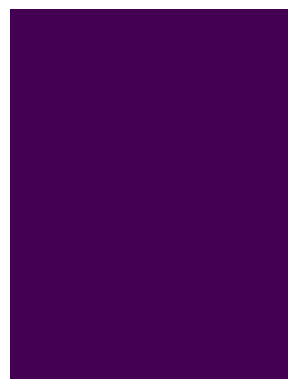

In [47]:
# 2) 从差图入手, 先将不同部分去除(后景), 然后再去展开到 255
plt.imshow(np.array(img_diff / 255, dtype=int) * 255)
plt.axis('off')

# Task4：RGB图像转HIS图像

- 要求：
  
    （1）复现RGB转HIS的python代码

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [49]:
def rgbtohsi(rgb_lwpImg):
    rows = int(rgb_lwpImg.shape[0])
    cols = int(rgb_lwpImg.shape[1])
    b, g, r = cv2.split(rgb_lwpImg)
    # 归一化到[0,1]
    b = b / 255.0
    g = g / 255.0
    r = r / 255.0
    hsi_lwpImg = rgb_lwpImg.copy()
    for i in range(rows):
        for j in range(cols):
            num = 0.5 * ((r[i, j] - g[i, j]) + (r[i, j] - b[i, j]))
            den = np.sqrt((r[i, j] - g[i, j]) ** 2 + (r[i, j] - b[i, j]) * (g[i, j] - b[i, j]))
            theta = float(np.arccos(num / den))

            if den == 0:
                H = 0
            elif b[i, j] <= g[i, j]:
                H = theta
            else:
                H = 2 * 3.14169265 - theta

            min_RGB = min(min(b[i, j], g[i, j]), r[i, j])
            sum = b[i, j] + g[i, j] + r[i, j]
            if sum == 0:
                S = 0
            else:
                S = 1 - 3 * min_RGB / sum

            H = H / (2 * 3.14159265)
            I = sum / 3.0
            # 输出HSI图像，扩充到255以方便显示，一般H分量在[0,2pi]之间，S和I在[0,1]之间
            hsi_lwpImg[i, j, 0] = H * 255
            hsi_lwpImg[i, j, 1] = S * 255
            hsi_lwpImg[i, j, 2] = I * 255
    return hsi_lwpImg

   （2）可视化HIS三个分量

C:\Users\LDH\AppData\Local\Temp\ipykernel_24544\3483835394.py:14: RuntimeWarning: invalid value encountered in scalar divide
  theta = float(np.arccos(num / den))


(-0.5, 3839.5, 2159.5, -0.5)

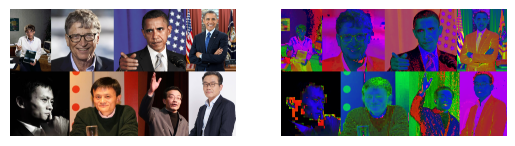

In [50]:
rgb_lwpImg = cv2.imread("C:\\Users\\LDH\\Desktop\\Test_1\\task4\\IMAGE.jpg")
hsi_lwpImg = rgbtohsi(rgb_lwpImg)

plt.subplot(1, 2, 1)
plt.imshow(rgb_lwpImg[...,::-1])
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(hsi_lwpImg)
plt.axis('off')